## Preliminary data analysis for Milestone 2 (ALEX)
### Dataset: Beer reviews

### Understand data structure inside datasets
(From available paper)

- Five stars / five-aspect rating system: **feel, look, smell, taste & overall**
- BA: 33 387 users, 66 051 beers, 1 586 259 reviews
- RB: 40 213 users, 110 419 beers, 2 924 127 reviews

'ba' system | 'rb' system
:----------:|:-----------:
![](../data/img/ba_rating_system.png) | ![](../data/img/rb_rating_system.png)

For both systems: 'rating' column (final score) is automatically generated based on the five aspects


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import utils.data_utils as data_utils
import sqlite3 as sql
importlib.reload(data_utils)

DATA_FOLDER = '../local_data/'


Load the datasets

In [44]:
m_beers_raw = pd.read_csv(DATA_FOLDER + 'merged/beers.csv', sep=',', header=[0, 1])
m_breweries_raw = pd.read_csv(DATA_FOLDER + 'merged/breweries.csv', sep=',', header=[0, 1])
m_ratings_raw = pd.read_csv(DATA_FOLDER + 'merged/ratings.csv', sep=',', header=[0, 1])
m_users_raw = pd.read_csv(DATA_FOLDER + 'merged/users_approx.csv', sep=',', header=[0, 1])

# # BA datasets
ba_users_raw = pd.read_csv(DATA_FOLDER + 'ba/users.csv', sep=',', header=[0])
ba_ratings_raw = data_utils.load_dict_like_text_file(DATA_FOLDER+'merged/ratings_with_text_ba.txt',BLK_SIZE=20_000, MAX_BLK=1_000_000)
print("Size of 'ba' ratings dataframe: %d" % ba_ratings_raw.index.size)

# # RB datasets
rb_users_raw = pd.read_csv(DATA_FOLDER + 'rb/users.csv', sep=',', header=[0])
rb_ratings_raw = data_utils.load_dict_like_text_file(DATA_FOLDER+'merged/ratings_with_text_rb.txt',BLK_SIZE=20_000, MAX_BLK=3_000_000)
print("Size of 'rb' ratings dataframe: %d" % rb_ratings_raw.index.size)

# Dump ratings with text BA to SQLite database
#data_utils.dump_text_file_to_sqlite(DATA_FOLDER+'merged/ratings_with_text_ba.txt', 'ba_reviews')

# Dump Dump ratings with text RB to SQLite database
# data_utils.dump_text_file_to_sqlite(DATA_FOLDER+'merged/ratings_with_text_rb.txt', 'rb_reviews')


LOADED 'ratings_with_text_ba.txt'                         
Size of 'ba' ratings dataframe: 289011
LOADED 'ratings_with_text_rb.txt'                         
Size of 'rb' ratings dataframe: 1020548


Sample random data from dataseet to see structure of dataframes (columns, possible type of data)

In [39]:
print("------------------------ BEERS.CSV ----------------------------------")
display(m_beers_raw.sample(3))

print("------------------------ BREWERIES.CSV ----------------------------------")
display(m_breweries_raw.sample(3))

print("------------------------ RATINGS.CSV ----------------------------------")
display(m_ratings_raw.sample(3))

print("------------------------ USER_APPROX.CSV ----------------------------------")
display(m_users_raw.sample(3))

------------------------ BEERS.CSV ----------------------------------


ba                                                                \
        abv   avg avg_computed avg_matched_valid_ratings ba_score beer_id   
23741   7.2  3.56     3.584211                     3.535     83.0   76662   
8627    5.0   NaN          NaN                       NaN      NaN  159317   
15820  13.0  4.24     4.327273                     4.352     88.0  263403   

                                                                         \
                            beer_name beer_wout_brewery_name brewery_id   
23741                  Helter Spelter         Helter Spelter      24075   
8627                          Pfäffer                Pfäffer      39068   
15820  AleSmith Boxcar Speedway Stout  Boxcar Stout Speedway        396   

                                 ...         rb                            \
                   brewery_name  ... brewery_id              brewery_name   
23741                 Funkwerks  ...      12024                 Funkwerks   
8627      Oberdörfer Chäuerbräu  ...      19495     Oberdörfer Chäuerbräu   
15820  AleSmith Brewing Company  ...        432  AleSmith Brewing Company   

                                                           \
      nbr_matched_valid_ratings nbr_ratings overall_score   
23741                        17          17          77.0   
8627                          1           1           NaN   
15820                        35          35         100.0   

                                                     scores       
                      style style_score    zscore      diff  sim  
23741       Specialty Grain        84.0  0.189702  1.000000  1.0  
8627   Spice/Herb/Vegetable         NaN  0.161214  1.000000  1.0  
15820        Imperial Stout        97.0  1.307729  0.622408  1.0  

[3 rows x 33 columns]

------------------------ BREWERIES.CSV ----------------------------------


ba                                                                  \
         id                  location                        name nbr_beers   
6476  45803      United States, Maine         Foulmouthed Brewing        12   
2241  39066               Switzerland                Cormano Vini         1   
3773  35740  United States, Wisconsin  Like Minds Brewing Company        21   

         rb                                                                  \
         id                  location                        name nbr_beers   
6476  27318      United States, Maine         Foulmouthed Brewing        18   
2241  21585               Switzerland                Cormano Vini         1   
3773  20161  United States, Wisconsin  Like Minds Brewing Company        19   

        scores       
          diff  sim  
6476  0.770562  1.0  
2241  1.000000  1.0  
3773  0.486268  1.0

------------------------ RATINGS.CSV ----------------------------------


ba                                                           \
       abv appearance aroma beer_id                       beer_name   
4035  5.20       4.00   4.0  218843                Black Water Pils   
3802  4.56       4.25   4.0  110909             Out.Haus Ales Stout   
9105  5.90       3.00   3.0   12451  Warsteiner Premium Oktoberfest   

                                                                 ...  \
     brewery_id         brewery_name        date overall palate  ...   
4035      30062  Stony Creek Brewery  1491645600    3.75   3.25  ...   
3802      33886        Out.Haus Ales  1403690400    4.00   4.25  ...   
9105        360  Warsteiner Brauerei  1064743200    3.00   3.00  ...   

                       rb                                    \
             brewery_name        date overall palate rating   
4035  Stony Creek Brewery  1491645600    15.0    3.0    3.6   
3802        Out.Haus Ales  1390042800    16.0    4.0    3.8   
9105  Warsteiner Brauerei  1064656800    12.0    3.0    3.0   

                                \
                   style taste   
4035         Schwarzbier   7.0   
3802               Stout   7.0   
9105  Oktoberfest/Märzen   6.0   

                                                                             
                                                   text user_id   user_name  
4035  From the 12 fl. oz. bottle with no date that I...   54937  puboflyons  
3802  From the 650 ml. bottle bottled on 20 December...   54937  puboflyons  
9105  In the glass a translucent golden amber color ...      46      Gusler  

[3 rows x 33 columns]

------------------------ USER_APPROX.CSV ----------------------------------


ba                                                   \
            joined                 location nbr_ratings nbr_reviews   
3296  1.035281e+09  United States, Virginia           3           1   
290   1.392203e+09  United States, New York           9           0   
3072  1.168859e+09     United States, Texas         181         169   

                                                                     rb  \
                   user_id      user_name user_name_lower        joined   
3296          mvhinkle.925       mvhinkle        mvhinkle  1.088503e+09   
290   justabeergeek.781901  justabeergeek   justabeergeek  1.330168e+09   
3072       riccymon.117035       Riccymon        riccymon  1.223114e+09   

                                                                  \
                     location nbr_ratings user_id      user_name   
3296  United States, Virginia           1   13337       mvhinkle   
290   United States, New York         203  160009  justabeergeek   
3072     United States, Texas           1   82544       Riccymon   

                     scores  
     user_name_lower    sim  
3296        mvhinkle    1.0  
290    justabeergeek    1.0  
3072        riccymon    1.0

Quick transformation for multi-indexing

In [40]:
m_beers = m_beers_raw.copy()
m_beers.loc[:, ('rb', 'source')] = 'rb'
m_beers.loc[:, ('ba', 'source')] = 'ba'
m_beers = pd.concat([m_beers['rb'], m_beers['ba']], axis=0).set_index(['source', 'beer_id'], drop=True)
# Same thing for ratings
m_ratings = m_ratings_raw.copy()
m_ratings.loc[:, ('rb', 'source')] = 'rb'
m_ratings.loc[:, ('ba', 'source')] = 'ba'
m_ratings = pd.concat([m_ratings['rb'], m_ratings['ba']], axis=0).set_index(['source', 'beer_id', 'user_id'], drop=True)
m_ratings['date'] = pd.to_datetime(m_ratings['date'], unit='s')
m_ratings.head(5)


abv  appearance  aroma  \
source beer_id user_id                            
rb     2360    83106    11.3         4.0   10.0   
       17109   91324     5.0         2.0    3.0   
       35298   98624     5.0         4.0    8.0   
       113596  98624     5.0         4.0    8.0   
       173481  98624     6.0         4.0    8.0   

                                                      beer_name  brewery_id  \
source beer_id user_id                                                        
rb     2360    83106                    Rochefort Trappistes 10         406   
       17109   91324                         Myanmar Lager Beer        2921   
       35298   98624     Cantillon Tyrnilambic Baie dArgousier        1069   
       113596  98624          Cantillon Pikkulinnun Viskilambic        1069   
       173481  98624    3 Fonteinen Oude Geuze (Armand & Tommy)        2058   

                                          brewery_name                date  \
source beer_id user_id                                                       
rb     2360    83106               Brasserie Rochefort 2013-12-22 11:00:00   
       17109   91324    Myanmar Brewery and Distillery 2011-11-29 11:00:00   
       35298   98624                         Cantillon 2012-11-22 11:00:00   
       113596  98624                         Cantillon 2014-11-17 11:00:00   
       173481  98624             Brouwerij 3 Fonteinen 2012-08-18 10:00:00   

                        overall  palate  rating                     style  \
source beer_id user_id                                                      
rb     2360    83106       19.0     4.0     4.6             Abt/Quadrupel   
       17109   91324        6.0     2.0     1.7                Pale Lager   
       35298   98624       17.0     4.0     4.1      Lambic Style - Fruit   
       113596  98624       16.0     4.0     4.1  Lambic Style - Unblended   
       173481  98624       16.0     4.0     4.0     Lambic Style - Gueuze   

                        taste  \
source beer_id user_id          
rb     2360    83106      9.0   
       17109   91324      4.0   
       35298   98624      8.0   
       113596  98624      9.0   
       173481  98624      8.0   

                                                                     text  \
source beer_id user_id                                                      
rb     2360    83106     a)  Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...   
       17109   91324    Can. Weak and watery, not the best beer of the...   
       35298   98624    Bottle @ One Pint Pub, Helsinki. Originally ra...   
       113596  98624    Draught @Â Pikkulintu, Helsinki, Finland. A pr...   
       173481  98624    750ml bottleBottling date: 2011/02/17 - Pours ...   

                          user_name review  
source beer_id user_id                      
rb     2360    83106       Erzengel    NaN  
       17109   91324    visionthing    NaN  
       35298   98624          tiong    NaN  
       113596  98624          tiong    NaN  
       173481  98624          tiong    NaN

Create a dataframe to show the different columns of the merged datasets

In [201]:
col_info = pd.DataFrame({'ba_ratings_text': pd.Series(ba_ratings_raw.columns),
            'rb_ratings_text': pd.Series(rb_ratings_raw.columns),
            'beers': pd.Series(m_beers.columns.unique()),
            'breweries': pd.Series(m_breweries_raw['ba'].columns.unique()),
            'users': pd.Series(m_users_raw['ba'].columns.unique()),
            'ratings': pd.Series(m_ratings_raw['ba'].columns.unique())})
col_info

,ba_ratings_text,rb_ratings_text,beers,breweries,users,ratings
0,beer_name,beer_name,abv,id,joined,abv
1,beer_id,beer_id,avg,location,location,appearance
2,brewery_name,brewery_name,avg_computed,name,nbr_ratings,aroma
3,brewery_id,brewery_id,avg_matched_valid_ratings,nbr_beers,nbr_reviews,beer_id
4,style,style,beer_name,NaN,user_id,beer_name
5,abv,abv,beer_wout_brewery_name,NaN,user_name,brewery_id
6,date,date,brewery_id,NaN,user_name_lower,brewery_name
7,user_name,user_name,brewery_name,NaN,NaN,date
8,user_id,user_id,nbr_matched_valid_ratings,NaN,NaN,overall
9,appearance,appearance,nbr_ratings,NaN,NaN,palate


### Analyzing and merging the reviews with text from ba and rb datasets

In [189]:
# Print columns
print("Columns of the 'ba' and 'rb' data")
display(pd.DataFrame([ba_ratings_raw.columns, rb_ratings_raw.columns]))

print("Review column? -------")
display(ba_ratings_raw['review'].value_counts())
#display(ba_ratings_raw[ba_ratings_raw.review == 'False'])
# Useless, so drop it
ba_ratings = ba_ratings_raw.copy()
rb_ratings = rb_ratings_raw.copy()
ba_ratings.drop('review', axis=1, inplace=True)
display(pd.DataFrame([ba_ratings.columns, rb_ratings_raw.columns]))

# with sql.connect('../local_data/all_reviews.db') as con:
#     df = pd.read_sql_query("SELECT * FROM ba_reviews WHERE review = 'True'", con)
#     display(df['review'].value_counts())
#     # cursor = con.cursor()
#     # cursor.execute("SELECT COUNT(*) FROM ba_reviews WHERE review = 'True'")
#     # print("Count of text reviews for the complete ba dataset: %d" % cursor.fetchone()[0])


Columns of the 'ba' and 'rb' data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
1,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,None


Review column? -------


review
True     272814
False     16197
Name: count, dtype: int64

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
1,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text


Merge rb and ba ratings with text in a single dataframe

**Before** merging, normalize all score data to have same basis (Some are over /5 /10 or even /20)!

In [190]:
# Perform normalization of data
# First, set all ratings columns to be float type
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
rb_ratings[cols] = rb_ratings[cols].astype(float)
ba_ratings[cols] = ba_ratings[cols].astype(float)

print("------ RB Stats (before normalization) -------")
display(rb_ratings.describe())
print("------ BA Stats (before normalization) -------")
display(ba_ratings.describe())

# Second, perform adjustments to have all scores /5
rb_ratings['overall'] = rb_ratings['overall'] / 4
rb_ratings[['taste', 'aroma']] = rb_ratings[['taste', 'aroma']] / 2

print("------ RB Stats (after normalization) -------")
display(rb_ratings.describe())
print("------ BA Stats (after normalization) -------")
display(ba_ratings.describe())

# Join rb and ba users dataframe to have access to location
rb_ratings['user_id'] = rb_ratings['user_id'].astype(int)
rb_ratings.drop(columns=['user_name'], inplace=True)
ba_ratings['user_id'] = ba_ratings['user_id'].astype(str)
ba_ratings.drop(columns=['user_name'], inplace=True)
ba_users_raw['user_id'] = ba_users_raw['user_id'].astype(str)
rb_user_ratings = rb_ratings.join(other=rb_users_raw.set_index('user_id'), on='user_id', how='left')
ba_user_ratings = ba_ratings.join(other=ba_users_raw.set_index('user_id'), on='user_id', how='left')
rb_user_ratings.rename(columns={'location': 'location_user'}, inplace=True)
ba_user_ratings.rename(columns={'location': 'location_user'}, inplace=True)

# Join brewery also to have access to location
rb_breweries = m_breweries_raw['rb']
rb_breweries['id'] = rb_breweries['id'].astype(int)
rb_user_ratings['brewery_id'] = rb_user_ratings['brewery_id'].astype(int)
ba_breweries = m_breweries_raw['ba']
ba_breweries['id'] = ba_breweries['id'].astype(int)
ba_user_ratings['brewery_id'] = ba_user_ratings['brewery_id'].astype(int)
rb_combined_ratings = rb_user_ratings.join(other=rb_breweries.set_index('id'), on='brewery_id', how='left')
ba_combined_ratings = ba_user_ratings.join(other=ba_breweries.set_index('id'), on='brewery_id', how='left')
rb_combined_ratings.rename(columns={'location': 'location_brewery'}, inplace=True)
ba_combined_ratings.rename(columns={'location': 'location_brewery'}, inplace=True)

print("------ RB user matched df -------")
display(rb_combined_ratings.sample(2))
print("------ BA user matched df -------")
display(ba_combined_ratings.sample(2))

# Merge rb and ba with text reviews in a single dataframe
rb_combined_ratings['source'] = 'rb'
ba_combined_ratings['source'] = 'ba'

print("------ Merged dataset with adjusted ratings scores -------")
df_text_ratings = pd.concat([ba_combined_ratings, rb_combined_ratings], axis=0)
df_text_ratings.sample(5)

------ RB Stats (before normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06
mean,3.504839e+00,6.664887e+00,3.369753e+00,6.719842e+00,1.369930e+01,3.395864e+00
std,7.213634e-01,1.331201e+00,7.384416e-01,1.342912e+00,2.697386e+00,5.798073e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.000000e+00,6.000000e+00,3.000000e+00,6.000000e+00,1.200000e+01,3.100000e+00
50%,3.000000e+00,7.000000e+00,3.000000e+00,7.000000e+00,1.400000e+01,3.500000e+00
75%,4.000000e+00,7.000000e+00,4.000000e+00,8.000000e+00,1.500000e+01,3.800000e+00
max,5.000000e+00,1.000000e+01,5.000000e+00,1.000000e+01,2.000000e+01,5.000000e+00


------ BA Stats (before normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,283857.000000,283857.000000,283857.000000,283857.000000,283857.000000,289011.000000
mean,3.909113,3.830079,3.827624,3.858796,3.867268,3.855613
std,0.551455,0.610412,0.612783,0.650667,0.631997,0.564464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,3.570000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.930000
75%,4.250000,4.250000,4.250000,4.250000,4.250000,4.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


------ RB Stats (after normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06,1.020548e+06
mean,3.504839e+00,3.332443e+00,3.369753e+00,3.359921e+00,3.424825e+00,3.395864e+00
std,7.213634e-01,6.656004e-01,7.384416e-01,6.714560e-01,6.743466e-01,5.798073e-01
min,1.000000e+00,5.000000e-01,1.000000e+00,5.000000e-01,2.500000e-01,5.000000e-01
25%,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.100000e+00
50%,3.000000e+00,3.500000e+00,3.000000e+00,3.500000e+00,3.500000e+00,3.500000e+00
75%,4.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,3.750000e+00,3.800000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


------ BA Stats (after normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,283857.000000,283857.000000,283857.000000,283857.000000,283857.000000,289011.000000
mean,3.909113,3.830079,3.827624,3.858796,3.867268,3.855613
std,0.551455,0.610412,0.612783,0.650667,0.631997,0.564464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000,3.570000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,3.930000
75%,4.250000,4.250000,4.250000,4.250000,4.250000,4.220000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


C:\Users\alexa\AppData\Local\Temp\ipykernel_17540\1858818212.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_breweries['id'] = rb_breweries['id'].astype(int)
C:\Users\alexa\AppData\Local\Temp\ipykernel_17540\1858818212.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_breweries['id'] = ba_breweries['id'].astype(int)


------ RB user matched df -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,overall,rating,text,nbr_ratings,user_name,joined,location_user,location_brewery,name,nbr_beers
263965,Dommelsch Pilsener,4968,Dommelsche Bierbrouwerij (InBev),855,Pilsener,5.0,1124186400,25944,5.0,4.5,...,4.5,4.4,Perfect beer for a normal drinking evening wit...,10.0,Donatus,1.124186e+09,Netherlands,Netherlands,Dommelsche Bierbrouwerij (InBev),15
325066,Brokreacja The Lumberjack,343489,Brokreacja,23551,Stout,6.7,1459850400,343351,3.0,4.0,...,4.5,4.1,Butelka. Drobna trwa?a piana. Barwa czarna. Ar...,323.0,jaro_wwa,1.415272e+09,Poland,Poland,Brokreacja,42


------ BA user matched df -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,rating,text,nbr_ratings,nbr_reviews,user_name,joined,location_user,location_brewery,name,nbr_beers
257374,Trappistes Rochefort 10,645,Brasserie de Rochefort,207,Quadrupel (Quad),11.3,1392462000,jay_ulreich.776271,4.5,4.5,...,4.60,Poured into my dads tulip/snifter like Maudite...,37,37,Jay_Ulreich,1.389784e+09,"United States, Indiana",Belgium,Brasserie de Rochefort,3
151569,Wibaux’s Gold,84348,Beaver Creek Brewery,18383,American Blonde Ale,5.5,1399024800,grizzbar.472861,4.5,3.0,...,3.72,"After supper at The GEM, a 1914 movie theater ...",58,3,grizzbar,1.277374e+09,"United States, Montana","United States, Montana",Beaver Creek Brewery,15


------ Merged dataset with adjusted ratings scores -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,text,nbr_ratings,nbr_reviews,user_name,joined,location_user,location_brewery,name,nbr_beers,source
971735,De Dochter van de Korenaar Bravoure O.A.S.E. (...,135594,De Dochter van de Korenaar,8907,Smoked,6.5,1356865200,111306,3.0,3.5,...,Bottle @ Ã rhus / Randers newyears tasting at ...,11801.0,NaN,Camons,1.281262e+09,Denmark,Belgium,De Dochter van de Korenaar,50,rb
647166,McNeills Extra Special Bitter Ale,5906,McNeills Brewery,1394,Premium Bitter/ESB,5.5,1140865200,33982,5.0,4.5,...,been drinking this for years and know it well....,2.0,NaN,erutt1,1.140865e+09,"United States, Pennsylvania","United States, Vermont",McNeills Brewery,53,rb
950307,t Smisje Grande Reserva,81558,Brouwerij Smisje,10142,Belgian Strong Ale,11.0,1332842400,33484,4.0,3.5,...,"Bottle @ Odense Late March Tasting, 2012. Pour...",15179.0,NaN,Dedollewaitor,1.139828e+09,Denmark,Belgium,Brouwerij Smisje,21,rb
990203,Kempisch Vuur Hoppergod,172341,Pirlot,14263,Belgian Ale,6.0,1406628000,231465,4.0,4.0,...,Sunny yellow with medium white cap. Citrusy ar...,1983.0,NaN,Alusmamuts,1.354446e+09,Latvia,Belgium,Pirlot,49,rb
1020414,Kuche Kuche,62481,Carlsberg Malawi Brewery,4358,Pale Lager,3.7,1360839600,61944,2.0,1.5,...,Bottle. I survived on this for a week in Lilon...,2165.0,NaN,Imaena,1.191578e+09,Mozambique,Malawi,Carlsberg Malawi Brewery,6,rb


Adjust datatypes to make it more convenient (especially dates and str)

In [ ]:
df_text_ratings['date'] = pd.to_datetime(df_text_ratings['date'], unit='s')
df_text_ratings['joined'] = pd.to_datetime(df_text_ratings['joined'], unit='s')

df_text_ratings[['beer_name', 'brewery_name', 'style', 'user_name', 'location_user', 'location_brewery']] = df_text_ratings[['beer_name', 'brewery_name', 'style', 'user_name', 'location_user', 'location_brewery']].astype(str)
df_text_ratings[['beer_id', 'brewery_id']] = df_text_ratings[['beer_id', 'brewery_id']].astype(int)
df_text_ratings[['abv',  'nbr_ratings', 'nbr_reviews']] = df_text_ratings[['abv',  'nbr_ratings', 'nbr_reviews']].astype(float)
df_text_ratings.sample(5)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,text,nbr_ratings,nbr_reviews,user_name,joined,location_user,location_brewery,name,nbr_beers,source
366456,Sprecher Irish Style Stout,9288,Sprecher Brewing Company,228,Dry Stout,5.73,2008-04-30 10:00:00,606,4.0,3.0,...,Bottle 500 ml Appearance Dark brown ale with...,7104.0,NaN,Radek Kliber,2001-03-16 11:00:00,Poland,"United States, Wisconsin",Sprecher Brewing Company,80,rb
291280,Carnegie Special 175th Anniversary Porter,155393,Carlsberg Sverige,765,Imperial Porter,8.80,2013-05-22 10:00:00,162663,4.0,4.0,...,Pours a rich brown color with a finger of khak...,2894.0,NaN,Lukaduke,2012-03-08 11:00:00,"United States, Maine",Sweden,Carlsberg Sverige,156,rb
16320,Dieu du Ciel Été Indien,26880,Dieu du Ciel,364,Berliner Weisse,5.00,2005-09-11 10:00:00,8034,2.0,3.5,...,"Not the most pleasant beer to look at, it pour...",5431.0,NaN,Rastacouere,2003-07-08 10:00:00,Canada,Canada,Dieu du Ciel,268,rb
464715,Just Beer Mamie Battleship Ale,126754,Buzzards Bay Brewing,286,Brown Ale,5.90,2010-07-21 10:00:00,53267,3.0,3.0,...,"Only available at Chancellors in Fall River, M...",1164.0,NaN,halfonit,2007-04-21 10:00:00,"United States, Massachusetts","United States, Massachusetts",Buzzards Bay Brewing,92,rb
863330,Buxton Imperial Black,161898,Buxton,11041,Black IPA,7.50,2014-11-26 11:00:00,334126,4.0,4.0,...,Robe Ã©paisse noire dâencre.Tout Ã fait tro...,289.0,NaN,BobyFischer,2014-09-04 10:00:00,France,England,Buxton,151,rb


Create a dataframe containing a multi-index : [country, style, beer]

Some pre-filtering is needed to match style and beers that are really close together

1. Check out location values under users

In [193]:
display(df_text_ratings['location_user'].value_counts()[:10])

# Lets check out the ones  with a commma (,)
display(df_text_ratings[df_text_ratings['location_user'].apply(lambda x: ',' in x)].loc[:,'location_user'].unique())

# Separate States and Country (add state column, filled with N.A. if no state)
df_text_ratings['country_user'] = df_text_ratings['location_user'].apply(lambda x: x.split(',')[0] if len(x.split(',')) > 0 else x)
df_text_ratings['country_brewery'] = df_text_ratings['location_brewery'].apply(lambda x: x.split(',')[0] if len(x.split(',')) > 0 else x)
df_text_ratings['state_user'] = df_text_ratings['location_user'].apply(lambda x: ''.join(x.split(',')[1:]) if len(x.split(',')) > 0 else None)
df_text_ratings['state_brewery'] = df_text_ratings['location_brewery'].apply(lambda x: ''.join(x.split(',')[1:]) if len(x.split(',')) > 0 else None)

display(df_text_ratings['country_user'].value_counts())
display(df_text_ratings['state_user'].value_counts())

location_user
Canada                         101483
Denmark                         76425
United States, California       67973
England                         62832
Sweden                          52591
United States, Pennsylvania     51223
Netherlands                     42050
United States, Illinois         40406
nan                             40108
United States, New York         38820
Name: count, dtype: int64

array(['United States, North Carolina', 'United States, New York',
       'United States, Illinois', 'United States, Massachusetts',
       'United States, Virginia', 'United States, South Carolina',
       'United States, Georgia', 'United States, West Virginia',
       'United States, Pennsylvania', 'United States, Alabama',
       'United States, New Hampshire', 'United States, Louisiana',
       'United States, Indiana', 'United States, Rhode Island',
       'United States, Missouri', 'United States, Arkansas',
       'United States, Ohio', 'United States, Connecticut',
       'United States, Florida', 'United States, Minnesota',
       'United States, New Jersey', 'United States, Maryland',
       'United States, Alaska', 'United States, Mississippi',
       'United States, Oregon', 'United States, Kentucky',
       'United States, Oklahoma', 'United States, California',
       'United States, Idaho', 'United States, Washington',
       'United States, Wisconsin', 'United States, 

country_user
United States                     680921
Canada                            101483
Denmark                            76425
England                            62832
Sweden                             52591
                                   ...  
Nepal                                  1
Armenia                                1
British Indian Ocean Territory         1
Solomon Islands                        1
Kenya                                  1
Name: count, Length: 136, dtype: int64

state_user
                   637843
 California         67973
 Pennsylvania       51223
 Illinois           40406
 New York           38820
 Texas              32660
 Washington         29563
 Ohio               29188
 New Jersey         27818
 Florida            26813
 Colorado           24432
 Minnesota          24285
 Virginia           23587
 Massachusetts      23567
 North Carolina     19176
 Michigan           16975
 Georgia            16783
 Wisconsin          16303
 Maryland           15254
 Oregon             14301
 Indiana            12980
 Arizona            11874
 Missouri           10486
 New Hampshire      10205
 Tennessee           9427
 Connecticut         9317
 Kentucky            7804
 Idaho               7265
 Iowa                7226
 Vermont             5564
 South Carolina      5212
 Nevada              4625
 Alabama             4507
 Kansas              4027
 Maine               3807
 Louisiana           3186
 Nebraska            2956
 Rhode Island        2742
 

2. Style of the beer

In [194]:
print("There is {0} styles of beer registered in the dataset".format(df_text_ratings['style'].unique().size))
display(df_text_ratings['style'].unique())

# Using ChatGPT to "cluster" and identify some generic categories for a pre-filtering of the styles
category_map = data_utils.get_beer_style_mapping()
df_text_ratings['style_category'] = df_text_ratings['style'].map(category_map).fillna('Other')

df_text_ratings['style_category'].value_counts()

There is 169 styles of beer registered in the dataset


array(['English Pale Ale', 'English Bitter', 'American Pale Wheat Ale',
       'American Double / Imperial Stout', 'Hefeweizen', 'American IPA',
       'English Porter', 'English India Pale Ale (IPA)',
       'German Pilsener', 'Kölsch', 'American Black Ale', 'Oatmeal Stout',
       'American Pale Ale (APA)', 'American Amber / Red Ale',
       'Milk / Sweet Stout', 'Saison / Farmhouse Ale',
       'Russian Imperial Stout', 'Tripel',
       'American Double / Imperial IPA', 'American Wild Ale',
       'English Stout', 'American Stout', 'Fruit / Vegetable Beer',
       'American Blonde Ale', 'Belgian Strong Pale Ale',
       'English Strong Ale', 'Old Ale',
       'Extra Special / Strong Bitter (ESB)', 'Witbier',
       'Herbed / Spiced Beer', 'English Dark Mild Ale', 'Czech Pilsener',
       'English Pale Mild Ale', 'English Brown Ale', 'Irish Red Ale',
       'Scottish Ale', 'Winter Warmer', 'Berliner Weissbier', 'Gose',
       'American Brown Ale', 'Scotch Ale / Wee Heavy', 'Euro Pale

style_category
India Pale Ale (IPA)    248960
Other                   227581
Pale Ale                150431
Belgian Ale             110887
Sour Ale                 82908
Specialty & Seasonal     66554
Stout                    64996
Saison & Farmhouse       63451
Strong Ale               53011
Lager                    45635
Wheat Beer               42028
Strong Lager             31149
Pilsner                  30735
Hybrid Styles            30319
Porter                   24360
Dark Lager               22254
Other Ales               21525
Low Alcohol               1980
Name: count, dtype: int64

3. Try to filter out same beers but written differently (upper/lower case, proposition added)

In [168]:
import re

display(df_text_ratings['beer_name'].value_counts()[df_text_ratings['beer_name'].value_counts() == 1][:20])

# Use tokenization to try to identify same beer spelled differently?
# Use regex tricks to filter strings and compare words

# Basic synthax filtering with regex

def clean_beer_name(name):
    # Lowercase, remove punctuation, extra spaces
    name = name.lower()
    name = re.sub(r'[^a-z\s]', '', name)  # Remove non-letter characters
    name = re.sub(r'\s+', ' ', name).strip()  # Remove extra spaces
    return name

df_text_ratings['cleaned_beer_name'] = df_text_ratings['beer_name'].apply(clean_beer_name)
df_text_ratings['beer'] = df_text_ratings['beer_name'].copy()
display(df_text_ratings[['beer_name', 'cleaned_beer_name']].sample(5))


beer_name
Vienna Cabinet Lager            1
Pelican The Guillotine          1
Freetail Hibernaculum Stout     1
Tunnel Traffic                  1
Giantsbane                      1
Wimpy                           1
Throne Of Bones                 1
Acoustic Kitty                  1
Hardy Porter                    1
Freetail Peach Berlinercus      1
Isophase                        1
Viñeta Witbier                  1
pFriem Juicy IPA                1
Pelican Meet The Flockers       1
Polka Pils                      1
Rhubarb IPA                     1
Freetail Super Nintripel        1
Gandy Dancer Dry Irish Stout    1
Hopturnal Emissions             1
Bullhead Brown                  1
Name: count, dtype: int64

,beer_name,cleaned_beer_name
570317,Weyerbacher Line Street Pilsner,weyerbacher line street pilsner
177901,Bardstown Brand Ale Aged In Bourbon Barrels,bardstown brand ale aged in bourbon barrels
607736,16 Mile Old Court Ale,mile old court ale
186053,Distelhäuser Frühlingsbock,distelhuser frhlingsbock
924840,Sinpalsken Blond,sinpalsken blond


4. Create multi-index structure [country, style, beer name]

In [169]:
df_ratings_sorted = df_text_ratings.set_index(['country', 'style_category', 'beer'], drop=True)
display(df_ratings_sorted.sample(5))
df_ratings_sorted.index.is_unique

,,,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,overall,rating,text,nbr_ratings,nbr_reviews,user_name,joined,location,state,cleaned_beer_name
country,style_category,beer,,,,,,,,,,,,,,,,,,,,,
Canada,India Pale Ale (IPA),Propeller IPA,Propeller IPA,52960,Propeller Brewery,1013,India Pale Ale (IPA),6.5,2012-10-04 10:00:00,9591,3.0,3.0,...,2.75,2.9,This IPA poured a light amber colour with a qu...,1121.0,NaN,Tessic,2003-11-30 11:00:00,Canada,,propeller ipa
Italy,India Pale Ale (IPA),Thornbridge Seaforth,Thornbridge Seaforth,106316,Thornbridge,4443,India Pale Ale (IPA),5.9,2015-01-17 11:00:00,81829,3.0,3.0,...,3.75,3.3,"Cask at Against The Grain, Dublin. It pours a ...",6633.0,NaN,teorn88,2008-09-20 10:00:00,Italy,,thornbridge seaforth
Denmark,Specialty & Seasonal,Fagnes Cuvée Guillaume,Fagnes Cuvée Guillaume,101240,Brasserie des Fagnes,668,Fruit Beer,4.5,2009-10-24 10:00:00,10185,3.0,1.5,...,0.25,1.3,"Bottle, 4.5%. Perfumy peach and apple aroma. C...",15425.0,NaN,MiP,2004-01-20 11:00:00,Denmark,,fagnes cuve guillaume
United States,Belgian Ale,The Shroud,The Shroud,158443,Burial Beer Co.,31722,Dubbel,7.6,2015-07-09 10:00:00,kygunner.694554,4.0,4.0,...,4.00,4.0,Never been a big fan of Dubbels but this one r...,1814.0,1814.0,KYGunner,2012-09-16 10:00:00,"United States, Kentucky",Kentucky,the shroud
Venezuela,India Pale Ale (IPA),Great Divide Titan IPA,Great Divide Titan IPA,25083,Great Divide Brewing Company,292,India Pale Ale (IPA),7.1,2011-10-18 10:00:00,62166,4.0,2.0,...,3.50,3.0,Pours cloudy orange with a frothy white head. ...,534.0,NaN,garza,2007-10-09 10:00:00,Venezuela,,great divide titan ipa


False

---

### Investigating the created dataframe containing reviews of beers indexed by countries

1. Look at the yearly and monthly distribution of data (reviews)

1318764


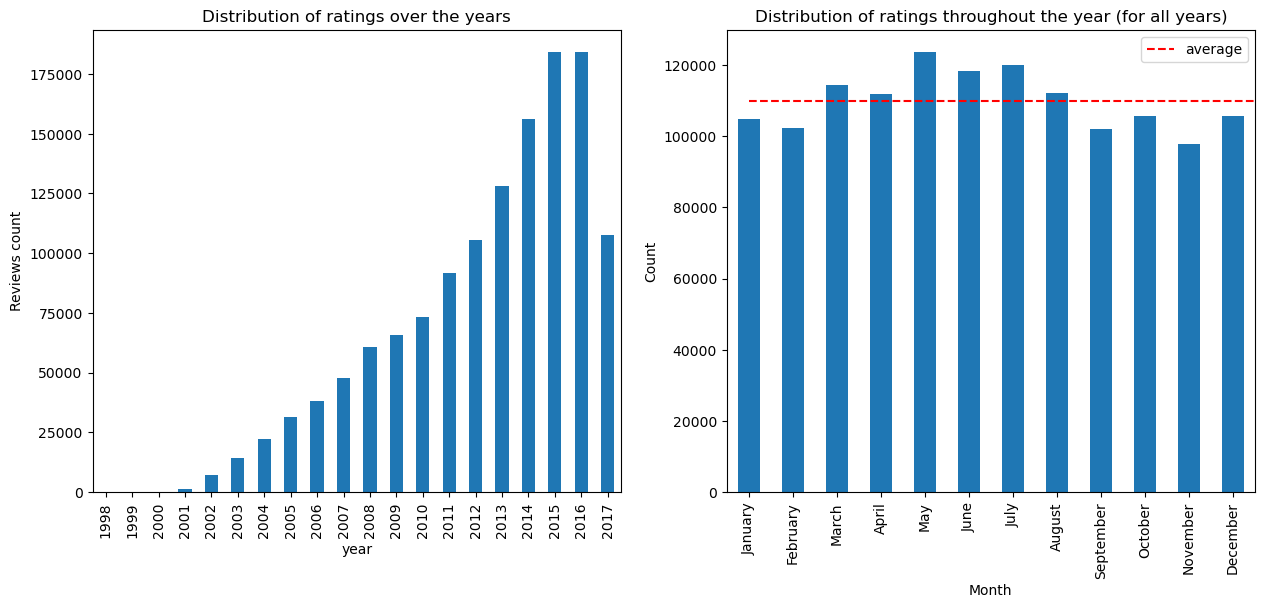

In [195]:
fig, ax = plt.subplots(1,2, figsize=(15,6))
df_text_ratings.groupby(df_text_ratings['date'].dt.year).size().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of ratings over the years')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Reviews count')
print(df_text_ratings.groupby(df_text_ratings['date'].dt.year).size().sum())
df_text_ratings.groupby(df_text_ratings['date'].dt.month).size().plot(kind='bar', ax=ax[1])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax[1].plot([0,12],[df_text_ratings.groupby(df_text_ratings['date'].dt.month).size().apply('mean')]*2, color='red', linestyle='--', label='average')
ax[1].set_title('Distribution of ratings throughout the year (for all years)')
ax[1].set_xticklabels(months)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')
ax[1].legend()
plt.show()

2. Distribution of ratings per style and per subcategories for a specefied country

Total # of ratings: 101483


Text(0, 0.5, 'Score (rating)')

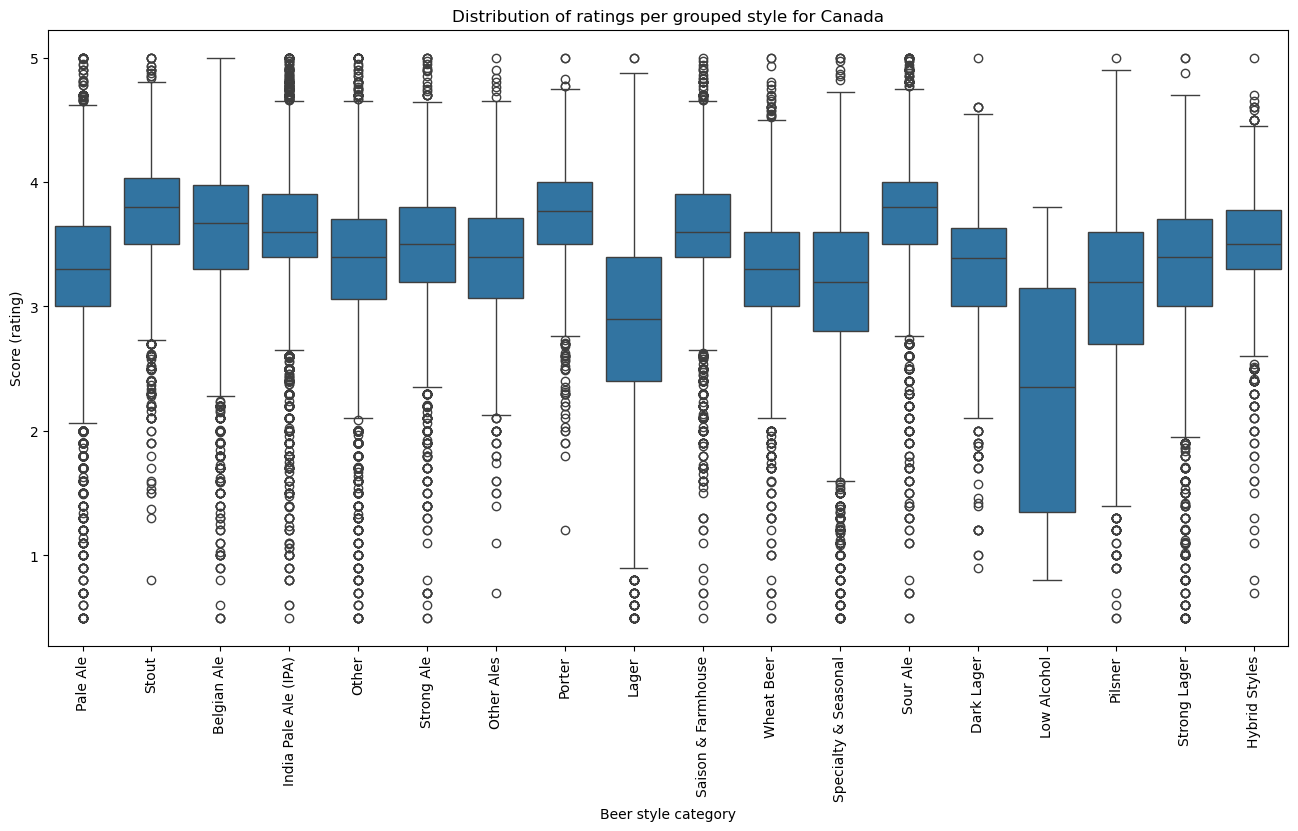

In [206]:
import seaborn as sns

country = 'Canada'
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

df_selected_country = df_text_ratings[df_text_ratings.country_user == country]

print("Total # of ratings: {0}".format(df_selected_country['rating'].count()))

plt.figure(figsize=(16,8))
sns.boxplot(x='style_category', y='rating', data=df_selected_country)
plt.xticks(rotation=90)
plt.title('Distribution of ratings per grouped style for {0}'.format(country))
plt.xlabel('Beer style category')
plt.ylabel('Score (rating)')

3. Look at users with a lot of reviews and try to look at the distribution of styles / # of different beers rated

In [ ]:
df_user_grouped = df_text_ratings.groupby('user_name')

df_user_grouped['rating'].count().sort_values(ascending=False)



user_name
yespr           5242
fonefan         5186
Ungstrup        4179
Travlr          3883
anders37        3762
                ... 
bluntman86         1
blueye80           1
DibtheLegend       1
Dibujob            1
Ãâlper          1
Name: rating, Length: 54359, dtype: int64

TODOs
- Checked overall VS rating columns
- Histogram of ratings per country per style (maybe top 3 styles)
- Histogram / Bar plot for user distribution over countries
- Check for NaNs and distrbiution
- Reorganize dataframes